In [47]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [35]:
df = pd.read_csv('/Users/devonbancroft/Desktop/Devon-GA-DAT-10-14/Data/movies/train.csv')

In [25]:
df.head()

,id,popularity,budget,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue,genre
0,0,0.421043,0,The Unforgiven,Burt Lancaster|Audrey Hepburn|Audie Murphy|Joh...,NaN,John Huston,A NEW TRIUMPH FROM ACADEMY AWARD WINNER JOHN H...,indian|texas|farm|siblings|saddle,The neighbors of a frontier family turn on the...,125,Action|Drama|Western,James Productions,1960-01-01,17,4.9,1960,0.0,0.0,Action
1,1,0.333643,0,The Brides of Dracula,Peter Cushing|Martita Hunt|Yvonne Monlaur|Fred...,NaN,Terence Fisher,He Turned Innocent Beauty Into Unspeakable Hor...,dracula|hammer horror|van helsing,A young teacher on her way to a position in Tr...,85,Horror,Hammer Film Productions|Hotspur Film Productio...,1960-01-01,19,6.6,1960,0.0,0.0,Horror
2,2,0.194948,0,Sink the Bismarck!,Kenneth More|Dana Wynter|Carl MÃ¶hner|Laurence...,NaN,Lewis Gilbert,NaN,NaN,A true WW2 story: the British Navy must find a...,97,Action|Drama|Foreign|History|War,Twentieth Century Fox Film Corporation,1960-02-11,12,4.9,1960,0.0,0.0,Action
3,3,0.136525,0,Carry On Constable,Kenneth Connor|Charles Hawtrey|Sid James|Kenne...,NaN,Gerald Thomas,Oh! What a Carry On When that Crazy Bunch Join...,carry on|police station,"With a flu epidemic running rife, three new bu...",86,Comedy,Peter Rogers Productions,1960-02-22,10,6.0,1960,0.0,0.0,Comedy
4,4,0.267118,0,Comanche Station,Randolph Scott|Nancy Gates|Skip Homeier|Dyke J...,NaN,Budd Boetticher,The One-Man War Against The Comancheros!,indian|comanche,A man saves a woman who had been kidnapped by ...,73,Action|Western,Columbia Pictures Corporation|Ranown Pictures ...,1960-03-01,12,6.5,1960,0.0,0.0,Action


In [6]:
df.describe()

,id,popularity,budget,runtime,vote_count,vote_average,release_year,budget_adj,revenue
count,8866.000000,8866.000000,8.866000e+03,8866.000000,8866.000000,8866.000000,8866.000000,8.866000e+03,8.866000e+03
mean,4432.500000,0.600999,1.510493e+07,103.215655,197.179337,5.991902,1998.468983,1.889727e+07,5.494696e+07
std,2559.538077,0.747259,3.020232e+07,32.383896,531.494836,0.902563,12.522404,3.480278e+07,1.479713e+08
min,0.000000,0.000065,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,2216.250000,0.211695,0.000000e+00,90.000000,17.000000,5.400000,1992.000000,0.000000e+00,0.000000e+00
50%,4432.500000,0.386024,1.000000e+01,100.000000,37.000000,6.000000,2002.500000,1.196464e+01,0.000000e+00
75%,6648.750000,0.696383,1.800000e+07,112.000000,135.000000,6.600000,2008.000000,2.424523e+07,4.100860e+07
max,8865.000000,12.037933,4.250000e+08,900.000000,9767.000000,9.200000,2012.000000,4.250000e+08,2.827124e+09


In [17]:
df = pd.concat([df, pd.get_dummies(df.genre)], axis=1)

In [18]:
df.head()

,id,popularity,budget,original_title,cast,homepage,director,tagline,keywords,overview,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0.421043,0,The Unforgiven,Burt Lancaster|Audrey Hepburn|Audie Murphy|Joh...,NaN,John Huston,A NEW TRIUMPH FROM ACADEMY AWARD WINNER JOHN H...,indian|texas|farm|siblings|saddle,The neighbors of a frontier family turn on the...,...,0,0,0,0,0,0,0,0,0,0
1,1,0.333643,0,The Brides of Dracula,Peter Cushing|Martita Hunt|Yvonne Monlaur|Fred...,NaN,Terence Fisher,He Turned Innocent Beauty Into Unspeakable Hor...,dracula|hammer horror|van helsing,A young teacher on her way to a position in Tr...,...,0,1,0,0,0,0,0,0,0,0
2,2,0.194948,0,Sink the Bismarck!,Kenneth More|Dana Wynter|Carl MÃ¶hner|Laurence...,NaN,Lewis Gilbert,NaN,NaN,A true WW2 story: the British Navy must find a...,...,0,0,0,0,0,0,0,0,0,0
3,3,0.136525,0,Carry On Constable,Kenneth Connor|Charles Hawtrey|Sid James|Kenne...,NaN,Gerald Thomas,Oh! What a Carry On When that Crazy Bunch Join...,carry on|police station,"With a flu epidemic running rife, three new bu...",...,0,0,0,0,0,0,0,0,0,0
4,4,0.267118,0,Comanche Station,Randolph Scott|Nancy Gates|Skip Homeier|Dyke J...,NaN,Budd Boetticher,The One-Man War Against The Comancheros!,indian|comanche,A man saves a woman who had been kidnapped by ...,...,0,0,0,0,0,0,0,0,0,0


In [19]:
from IPython.display import display
pd.options.display.max_columns = None
df.head()

,id,popularity,budget,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue,genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0.421043,0,The Unforgiven,Burt Lancaster|Audrey Hepburn|Audie Murphy|Joh...,NaN,John Huston,A NEW TRIUMPH FROM ACADEMY AWARD WINNER JOHN H...,indian|texas|farm|siblings|saddle,The neighbors of a frontier family turn on the...,125,Action|Drama|Western,James Productions,1960-01-01,17,4.9,1960,0.0,0.0,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.333643,0,The Brides of Dracula,Peter Cushing|Martita Hunt|Yvonne Monlaur|Fred...,NaN,Terence Fisher,He Turned Innocent Beauty Into Unspeakable Hor...,dracula|hammer horror|van helsing,A young teacher on her way to a position in Tr...,85,Horror,Hammer Film Productions|Hotspur Film Productio...,1960-01-01,19,6.6,1960,0.0,0.0,Horror,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,2,0.194948,0,Sink the Bismarck!,Kenneth More|Dana Wynter|Carl MÃ¶hner|Laurence...,NaN,Lewis Gilbert,NaN,NaN,A true WW2 story: the British Navy must find a...,97,Action|Drama|Foreign|History|War,Twentieth Century Fox Film Corporation,1960-02-11,12,4.9,1960,0.0,0.0,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0.136525,0,Carry On Constable,Kenneth Connor|Charles Hawtrey|Sid James|Kenne...,NaN,Gerald Thomas,Oh! What a Carry On When that Crazy Bunch Join...,carry on|police station,"With a flu epidemic running rife, three new bu...",86,Comedy,Peter Rogers Productions,1960-02-22,10,6.0,1960,0.0,0.0,Comedy,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0.267118,0,Comanche Station,Randolph Scott|Nancy Gates|Skip Homeier|Dyke J...,NaN,Budd Boetticher,The One-Man War Against The Comancheros!,indian|comanche,A man saves a woman who had been kidnapped by ...,73,Action|Western,Columbia Pictures Corporation|Ranown Pictures ...,1960-03-01,12,6.5,1960,0.0,0.0,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
df.groupby(df.homepage.isnull()).release_year.describe()

,count,mean,std,min,25%,50%,75%,max
homepage,,,,,,,,
False,2198.0,2006.659236,6.852094,1961.0,2006.0,2009.0,2011.0,2012.0
True,6668.0,1995.769196,12.791845,1960.0,1988.0,1999.0,2006.0,2012.0


In [27]:
df['genres'] = df.genres.str.split('|')

In [28]:
df.head()

,id,popularity,budget,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue,genre
0,0,0.421043,0,The Unforgiven,Burt Lancaster|Audrey Hepburn|Audie Murphy|Joh...,NaN,John Huston,A NEW TRIUMPH FROM ACADEMY AWARD WINNER JOHN H...,indian|texas|farm|siblings|saddle,The neighbors of a frontier family turn on the...,125,"[Action, Drama, Western]",James Productions,1960-01-01,17,4.9,1960,0.0,0.0,Action
1,1,0.333643,0,The Brides of Dracula,Peter Cushing|Martita Hunt|Yvonne Monlaur|Fred...,NaN,Terence Fisher,He Turned Innocent Beauty Into Unspeakable Hor...,dracula|hammer horror|van helsing,A young teacher on her way to a position in Tr...,85,[Horror],Hammer Film Productions|Hotspur Film Productio...,1960-01-01,19,6.6,1960,0.0,0.0,Horror
2,2,0.194948,0,Sink the Bismarck!,Kenneth More|Dana Wynter|Carl MÃ¶hner|Laurence...,NaN,Lewis Gilbert,NaN,NaN,A true WW2 story: the British Navy must find a...,97,"[Action, Drama, Foreign, History, War]",Twentieth Century Fox Film Corporation,1960-02-11,12,4.9,1960,0.0,0.0,Action
3,3,0.136525,0,Carry On Constable,Kenneth Connor|Charles Hawtrey|Sid James|Kenne...,NaN,Gerald Thomas,Oh! What a Carry On When that Crazy Bunch Join...,carry on|police station,"With a flu epidemic running rife, three new bu...",86,[Comedy],Peter Rogers Productions,1960-02-22,10,6.0,1960,0.0,0.0,Comedy
4,4,0.267118,0,Comanche Station,Randolph Scott|Nancy Gates|Skip Homeier|Dyke J...,NaN,Budd Boetticher,The One-Man War Against The Comancheros!,indian|comanche,A man saves a woman who had been kidnapped by ...,73,"[Action, Western]",Columbia Pictures Corporation|Ranown Pictures ...,1960-03-01,12,6.5,1960,0.0,0.0,Action


In [33]:
df.genres.str.get_dummies()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [36]:
df = pd.concat([df, df.genres.str.get_dummies()], axis=1)

In [54]:
df.shape

(8866, 40)

In [37]:
df.head()

,id,popularity,budget,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue,genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0.421043,0,The Unforgiven,Burt Lancaster|Audrey Hepburn|Audie Murphy|Joh...,NaN,John Huston,A NEW TRIUMPH FROM ACADEMY AWARD WINNER JOHN H...,indian|texas|farm|siblings|saddle,The neighbors of a frontier family turn on the...,125,Action|Drama|Western,James Productions,1960-01-01,17,4.9,1960,0.0,0.0,Action,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0.333643,0,The Brides of Dracula,Peter Cushing|Martita Hunt|Yvonne Monlaur|Fred...,NaN,Terence Fisher,He Turned Innocent Beauty Into Unspeakable Hor...,dracula|hammer horror|van helsing,A young teacher on her way to a position in Tr...,85,Horror,Hammer Film Productions|Hotspur Film Productio...,1960-01-01,19,6.6,1960,0.0,0.0,Horror,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,2,0.194948,0,Sink the Bismarck!,Kenneth More|Dana Wynter|Carl MÃ¶hner|Laurence...,NaN,Lewis Gilbert,NaN,NaN,A true WW2 story: the British Navy must find a...,97,Action|Drama|Foreign|History|War,Twentieth Century Fox Film Corporation,1960-02-11,12,4.9,1960,0.0,0.0,Action,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0
3,3,0.136525,0,Carry On Constable,Kenneth Connor|Charles Hawtrey|Sid James|Kenne...,NaN,Gerald Thomas,Oh! What a Carry On When that Crazy Bunch Join...,carry on|police station,"With a flu epidemic running rife, three new bu...",86,Comedy,Peter Rogers Productions,1960-02-22,10,6.0,1960,0.0,0.0,Comedy,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0.267118,0,Comanche Station,Randolph Scott|Nancy Gates|Skip Homeier|Dyke J...,NaN,Budd Boetticher,The One-Man War Against The Comancheros!,indian|comanche,A man saves a woman who had been kidnapped by ...,73,Action|Western,Columbia Pictures Corporation|Ranown Pictures ...,1960-03-01,12,6.5,1960,0.0,0.0,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [39]:
df.dtypes

id                        int64
popularity              float64
budget                    int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue                 float64
genre                    object
Action                    int64
Adventure                 int64
Animation                 int64
Comedy                    int64
Crime                     int64
Documentary               int64
Drama                     int64
Family                    int64
Fantasy                   int64
Foreign                   int64
History                   int64
Horror  

In [40]:
X = df[['budget', 'popularity']]
y = df.revenue

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

In [49]:
scores = cross_val_score(estimator=lreg, X=X_train, y=y_train, cv=10)
scores.mean()

0.5093920040578477

In [81]:
genre_cols = df.iloc[:, -20:].columns.to_list()

In [87]:
df.iloc[:, -20:].columns

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [96]:
pd.concat([df[['revenue', 'popularity']], df.loc[:, (df.columns.isin(genre_cols))]], axis=1)

,revenue,popularity,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0.000000e+00,0.421043,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.000000e+00,0.333643,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0.000000e+00,0.194948,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0
3,0.000000e+00,0.136525,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.000000e+00,0.267118,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0.000000e+00,0.256779,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
6,0.000000e+00,0.569424,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
7,0.000000e+00,0.269428,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,0.000000e+00,0.254124,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
9,1.843242e+08,0.947307,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [91]:
df.iloc[:, [1, 3]]

,popularity,original_title
0,0.421043,The Unforgiven
1,0.333643,The Brides of Dracula
2,0.194948,Sink the Bismarck!
3,0.136525,Carry On Constable
4,0.267118,Comanche Station
5,0.256779,Exodus
6,0.569424,Peeping Tom
7,0.269428,Sergeant Rutledge
8,0.254124,Pollyanna
9,0.947307,The Apartment


In [97]:
genre_cols = df.iloc[:, -20:-2].columns.to_list()
X = pd.concat([df[['budget', 'popularity']], df.loc[:, (df.columns.isin(genre_cols))]], axis=1)
y = df.revenue

In [99]:
scores = cross_val_score(estimator=lreg, X=X, y=y, cv=10)
scores.mean()

0.54020855780739

In [100]:
df.head()

,id,popularity,budget,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue,genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0.421043,0,The Unforgiven,Burt Lancaster|Audrey Hepburn|Audie Murphy|Joh...,NaN,John Huston,A NEW TRIUMPH FROM ACADEMY AWARD WINNER JOHN H...,indian|texas|farm|siblings|saddle,The neighbors of a frontier family turn on the...,125,Action|Drama|Western,James Productions,1960-01-01,17,4.9,1960,0.0,0.0,Action,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0.333643,0,The Brides of Dracula,Peter Cushing|Martita Hunt|Yvonne Monlaur|Fred...,NaN,Terence Fisher,He Turned Innocent Beauty Into Unspeakable Hor...,dracula|hammer horror|van helsing,A young teacher on her way to a position in Tr...,85,Horror,Hammer Film Productions|Hotspur Film Productio...,1960-01-01,19,6.6,1960,0.0,0.0,Horror,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,2,0.194948,0,Sink the Bismarck!,Kenneth More|Dana Wynter|Carl MÃ¶hner|Laurence...,NaN,Lewis Gilbert,NaN,NaN,A true WW2 story: the British Navy must find a...,97,Action|Drama|Foreign|History|War,Twentieth Century Fox Film Corporation,1960-02-11,12,4.9,1960,0.0,0.0,Action,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0
3,3,0.136525,0,Carry On Constable,Kenneth Connor|Charles Hawtrey|Sid James|Kenne...,NaN,Gerald Thomas,Oh! What a Carry On When that Crazy Bunch Join...,carry on|police station,"With a flu epidemic running rife, three new bu...",86,Comedy,Peter Rogers Productions,1960-02-22,10,6.0,1960,0.0,0.0,Comedy,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0.267118,0,Comanche Station,Randolph Scott|Nancy Gates|Skip Homeier|Dyke J...,NaN,Budd Boetticher,The One-Man War Against The Comancheros!,indian|comanche,A man saves a woman who had been kidnapped by ...,73,Action|Western,Columbia Pictures Corporation|Ranown Pictures ...,1960-03-01,12,6.5,1960,0.0,0.0,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [101]:
df.budget.isnull().value_counts()

False    8866
Name: budget, dtype: int64

In [102]:
df.popularity.isnull().value_counts()

False    8866
Name: popularity, dtype: int64

In [103]:
df.genres.isnull().value_counts()

False    8850
True       16
Name: genres, dtype: int64

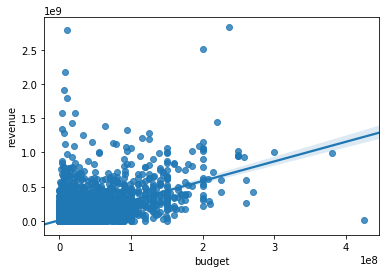

In [108]:
sns.regplot(df.budget, df.revenue)

In [112]:
df.release_date = pd.to_datetime(df.release_date)

In [114]:
df.dtypes

id                               int64
popularity                     float64
budget                           int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue                        float64
genre                           object
Action                           int64
Adventure                        int64
Animation                        int64
Comedy                           int64
Crime                            int64
Documentary              

In [115]:
df.head()

,id,popularity,budget,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue,genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0.421043,0,The Unforgiven,Burt Lancaster|Audrey Hepburn|Audie Murphy|Joh...,NaN,John Huston,A NEW TRIUMPH FROM ACADEMY AWARD WINNER JOHN H...,indian|texas|farm|siblings|saddle,The neighbors of a frontier family turn on the...,125,Action|Drama|Western,James Productions,1960-01-01,17,4.9,1960,0.0,0.0,Action,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0.333643,0,The Brides of Dracula,Peter Cushing|Martita Hunt|Yvonne Monlaur|Fred...,NaN,Terence Fisher,He Turned Innocent Beauty Into Unspeakable Hor...,dracula|hammer horror|van helsing,A young teacher on her way to a position in Tr...,85,Horror,Hammer Film Productions|Hotspur Film Productio...,1960-01-01,19,6.6,1960,0.0,0.0,Horror,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,2,0.194948,0,Sink the Bismarck!,Kenneth More|Dana Wynter|Carl MÃ¶hner|Laurence...,NaN,Lewis Gilbert,NaN,NaN,A true WW2 story: the British Navy must find a...,97,Action|Drama|Foreign|History|War,Twentieth Century Fox Film Corporation,1960-02-11,12,4.9,1960,0.0,0.0,Action,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0
3,3,0.136525,0,Carry On Constable,Kenneth Connor|Charles Hawtrey|Sid James|Kenne...,NaN,Gerald Thomas,Oh! What a Carry On When that Crazy Bunch Join...,carry on|police station,"With a flu epidemic running rife, three new bu...",86,Comedy,Peter Rogers Productions,1960-02-22,10,6.0,1960,0.0,0.0,Comedy,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0.267118,0,Comanche Station,Randolph Scott|Nancy Gates|Skip Homeier|Dyke J...,NaN,Budd Boetticher,The One-Man War Against The Comancheros!,indian|comanche,A man saves a woman who had been kidnapped by ...,73,Action|Western,Columbia Pictures Corporation|Ranown Pictures ...,1960-03-01,12,6.5,1960,0.0,0.0,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [121]:
df.set_index('release_date', inplace=True)

In [123]:
df['dayofweek'] = df.index.dayofweek

In [124]:
df.head()

,id,popularity,budget,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue,genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,dayofweek
release_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1960-01-01,0,0.421043,0,The Unforgiven,Burt Lancaster|Audrey Hepburn|Audie Murphy|Joh...,NaN,John Huston,A NEW TRIUMPH FROM ACADEMY AWARD WINNER JOHN H...,indian|texas|farm|siblings|saddle,The neighbors of a frontier family turn on the...,125,Action|Drama|Western,James Productions,17,4.9,1960,0.0,0.0,Action,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,4
1960-01-01,1,0.333643,0,The Brides of Dracula,Peter Cushing|Martita Hunt|Yvonne Monlaur|Fred...,NaN,Terence Fisher,He Turned Innocent Beauty Into Unspeakable Hor...,dracula|hammer horror|van helsing,A young teacher on her way to a position in Tr...,85,Horror,Hammer Film Productions|Hotspur Film Productio...,19,6.6,1960,0.0,0.0,Horror,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4
1960-02-11,2,0.194948,0,Sink the Bismarck!,Kenneth More|Dana Wynter|Carl MÃ¶hner|Laurence...,NaN,Lewis Gilbert,NaN,NaN,A true WW2 story: the British Navy must find a...,97,Action|Drama|Foreign|History|War,Twentieth Century Fox Film Corporation,12,4.9,1960,0.0,0.0,Action,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,3
1960-02-22,3,0.136525,0,Carry On Constable,Kenneth Connor|Charles Hawtrey|Sid James|Kenne...,NaN,Gerald Thomas,Oh! What a Carry On When that Crazy Bunch Join...,carry on|police station,"With a flu epidemic running rife, three new bu...",86,Comedy,Peter Rogers Productions,10,6.0,1960,0.0,0.0,Comedy,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1960-03-01,4,0.267118,0,Comanche Station,Randolph Scott|Nancy Gates|Skip Homeier|Dyke J...,NaN,Budd Boetticher,The One-Man War Against The Comancheros!,indian|comanche,A man saves a woman who had been kidnapped by ...,73,Action|Western,Columbia Pictures Corporation|Ranown Pictures ...,12,6.5,1960,0.0,0.0,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


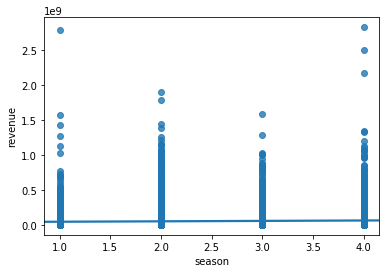

In [133]:
sns.regplot(df.season, df.revenue)

In [144]:
genre_cols = df.iloc[:, -20:].columns.to_list()
X = pd.concat([df[['budget', 'popularity', 'dayofweek']], df.loc[:, (df.columns.isin(genre_cols))]], axis=1)
y = df.revenue

In [145]:
scores = cross_val_score(estimator=lreg, X=X, y=y, cv=10)
scores.mean()

0.5383939469997516

In [130]:
df['season'] = df.index.quarter

In [142]:
genre_cols = df.iloc[:, -20:].columns.to_list()
X = pd.concat([df[['budget', 'popularity', 'dayofweek', 'season']], df.loc[:, (df.columns.isin(genre_cols))]], axis=1)
y = df.revenue

In [143]:
scores = cross_val_score(estimator=lreg, X=X, y=y, cv=10)
scores.mean()

0.5383939469997517

In [139]:
genre_cols = df.iloc[:, -20:-2].columns.to_list()
genre_cols

['Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western']

In [146]:
pd.concat([df[['budget', 'popularity', 'dayofweek']], df.loc[:, (df.columns.isin(genre_cols))]], axis=1)

,budget,popularity,dayofweek,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,dayofweek,season
release_date,,,,,,,,,,,,,,,,,,,,,,,
1960-01-01,0,0.421043,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,4,1
1960-01-01,0,0.333643,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,1
1960-02-11,0,0.194948,3,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,3,1
1960-02-22,0,0.136525,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1960-03-01,0,0.267118,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1960-03-27,0,0.256779,6,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,6,1
1960-04-06,0,0.569424,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2,2
1960-05-18,0,0.269428,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2
1960-05-19,0,0.254124,3,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,3,2


In [148]:
df['dayofweek'] = df['dayofweek'].map({
    0:'Mon',
    1:'Tues',
    2:'Wed',
    3:'Thur',
    4:'Fri',
    5:'Sat',
    6:'Sun'
})

In [149]:
df.head()

,id,popularity,budget,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue,genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,dayofweek,season
release_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1960-01-01,0,0.421043,0,The Unforgiven,Burt Lancaster|Audrey Hepburn|Audie Murphy|Joh...,NaN,John Huston,A NEW TRIUMPH FROM ACADEMY AWARD WINNER JOHN H...,indian|texas|farm|siblings|saddle,The neighbors of a frontier family turn on the...,125,Action|Drama|Western,James Productions,17,4.9,1960,0.0,0.0,Action,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,Fri,1
1960-01-01,1,0.333643,0,The Brides of Dracula,Peter Cushing|Martita Hunt|Yvonne Monlaur|Fred...,NaN,Terence Fisher,He Turned Innocent Beauty Into Unspeakable Hor...,dracula|hammer horror|van helsing,A young teacher on her way to a position in Tr...,85,Horror,Hammer Film Productions|Hotspur Film Productio...,19,6.6,1960,0.0,0.0,Horror,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Fri,1
1960-02-11,2,0.194948,0,Sink the Bismarck!,Kenneth More|Dana Wynter|Carl MÃ¶hner|Laurence...,NaN,Lewis Gilbert,NaN,NaN,A true WW2 story: the British Navy must find a...,97,Action|Drama|Foreign|History|War,Twentieth Century Fox Film Corporation,12,4.9,1960,0.0,0.0,Action,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,Thur,1
1960-02-22,3,0.136525,0,Carry On Constable,Kenneth Connor|Charles Hawtrey|Sid James|Kenne...,NaN,Gerald Thomas,Oh! What a Carry On When that Crazy Bunch Join...,carry on|police station,"With a flu epidemic running rife, three new bu...",86,Comedy,Peter Rogers Productions,10,6.0,1960,0.0,0.0,Comedy,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mon,1
1960-03-01,4,0.267118,0,Comanche Station,Randolph Scott|Nancy Gates|Skip Homeier|Dyke J...,NaN,Budd Boetticher,The One-Man War Against The Comancheros!,indian|comanche,A man saves a woman who had been kidnapped by ...,73,Action|Western,Columbia Pictures Corporation|Ranown Pictures ...,12,6.5,1960,0.0,0.0,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Tues,1


In [150]:
df['season'] = df['season'].map({
    1:'Winter',
    2:'Spring',
    3:'Summer',
    4:'Fall'
})

In [151]:
df.head()

,id,popularity,budget,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue,genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,dayofweek,season
release_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1960-01-01,0,0.421043,0,The Unforgiven,Burt Lancaster|Audrey Hepburn|Audie Murphy|Joh...,NaN,John Huston,A NEW TRIUMPH FROM ACADEMY AWARD WINNER JOHN H...,indian|texas|farm|siblings|saddle,The neighbors of a frontier family turn on the...,125,Action|Drama|Western,James Productions,17,4.9,1960,0.0,0.0,Action,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,Fri,Winter
1960-01-01,1,0.333643,0,The Brides of Dracula,Peter Cushing|Martita Hunt|Yvonne Monlaur|Fred...,NaN,Terence Fisher,He Turned Innocent Beauty Into Unspeakable Hor...,dracula|hammer horror|van helsing,A young teacher on her way to a position in Tr...,85,Horror,Hammer Film Productions|Hotspur Film Productio...,19,6.6,1960,0.0,0.0,Horror,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Fri,Winter
1960-02-11,2,0.194948,0,Sink the Bismarck!,Kenneth More|Dana Wynter|Carl MÃ¶hner|Laurence...,NaN,Lewis Gilbert,NaN,NaN,A true WW2 story: the British Navy must find a...,97,Action|Drama|Foreign|History|War,Twentieth Century Fox Film Corporation,12,4.9,1960,0.0,0.0,Action,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,Thur,Winter
1960-02-22,3,0.136525,0,Carry On Constable,Kenneth Connor|Charles Hawtrey|Sid James|Kenne...,NaN,Gerald Thomas,Oh! What a Carry On When that Crazy Bunch Join...,carry on|police station,"With a flu epidemic running rife, three new bu...",86,Comedy,Peter Rogers Productions,10,6.0,1960,0.0,0.0,Comedy,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mon,Winter
1960-03-01,4,0.267118,0,Comanche Station,Randolph Scott|Nancy Gates|Skip Homeier|Dyke J...,NaN,Budd Boetticher,The One-Man War Against The Comancheros!,indian|comanche,A man saves a woman who had been kidnapped by ...,73,Action|Western,Columbia Pictures Corporation|Ranown Pictures ...,12,6.5,1960,0.0,0.0,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Tues,Winter


In [152]:
pd.get_dummies(df.dayofweek)

,Fri,Mon,Sat,Sun,Thur,Tues,Wed
release_date,,,,,,,
1960-01-01,1,0,0,0,0,0,0
1960-01-01,1,0,0,0,0,0,0
1960-02-11,0,0,0,0,1,0,0
1960-02-22,0,1,0,0,0,0,0
1960-03-01,0,0,0,0,0,1,0
1960-03-27,0,0,0,1,0,0,0
1960-04-06,0,0,0,0,0,0,1
1960-05-18,0,0,0,0,0,0,1
1960-05-19,0,0,0,0,1,0,0


In [156]:
df = pd.concat([df.drop('dayofweek', axis=1),pd.get_dummies(df.dayofweek)], axis=1)

In [158]:
df = pd.concat([df.drop('season', axis=1),pd.get_dummies(df.season)], axis=1)

In [161]:
df.head()

,id,popularity,budget,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue,genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Fri,Mon,Sat,Sun,Thur,Tues,Wed,Fall,Spring,Summer,Winter
release_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1960-01-01,0,0.421043,0,The Unforgiven,Burt Lancaster|Audrey Hepburn|Audie Murphy|Joh...,NaN,John Huston,A NEW TRIUMPH FROM ACADEMY AWARD WINNER JOHN H...,indian|texas|farm|siblings|saddle,The neighbors of a frontier family turn on the...,125,Action|Drama|Western,James Productions,17,4.9,1960,0.0,0.0,Action,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
1960-01-01,1,0.333643,0,The Brides of Dracula,Peter Cushing|Martita Hunt|Yvonne Monlaur|Fred...,NaN,Terence Fisher,He Turned Innocent Beauty Into Unspeakable Hor...,dracula|hammer horror|van helsing,A young teacher on her way to a position in Tr...,85,Horror,Hammer Film Productions|Hotspur Film Productio...,19,6.6,1960,0.0,0.0,Horror,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1960-02-11,2,0.194948,0,Sink the Bismarck!,Kenneth More|Dana Wynter|Carl MÃ¶hner|Laurence...,NaN,Lewis Gilbert,NaN,NaN,A true WW2 story: the British Navy must find a...,97,Action|Drama|Foreign|History|War,Twentieth Century Fox Film Corporation,12,4.9,1960,0.0,0.0,Action,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1960-02-22,3,0.136525,0,Carry On Constable,Kenneth Connor|Charles Hawtrey|Sid James|Kenne...,NaN,Gerald Thomas,Oh! What a Carry On When that Crazy Bunch Join...,carry on|police station,"With a flu epidemic running rife, three new bu...",86,Comedy,Peter Rogers Productions,10,6.0,1960,0.0,0.0,Comedy,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1960-03-01,4,0.267118,0,Comanche Station,Randolph Scott|Nancy Gates|Skip Homeier|Dyke J...,NaN,Budd Boetticher,The One-Man War Against The Comancheros!,indian|comanche,A man saves a woman who had been kidnapped by ...,73,Action|Western,Columbia Pictures Corporation|Ranown Pictures ...,12,6.5,1960,0.0,0.0,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


In [164]:
genre_cols = df.iloc[:, -31:].columns.to_list()
genre_cols

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western',
 'Fri',
 'Mon',
 'Sat',
 'Sun',
 'Thur',
 'Tues',
 'Wed',
 'Fall',
 'Spring',
 'Summer',
 'Winter']

In [165]:
X = pd.concat([df[['budget', 'popularity']], df.loc[:, (df.columns.isin(genre_cols))]], axis=1)
y = df.revenue
scores = cross_val_score(estimator=lreg, X=X, y=y, cv=10)
scores.mean()

In [167]:
scores = cross_val_score(estimator=lreg, X=X, y=y, cv=10)
scores.mean()

0.5418517039905709

In [168]:
X = df[['budget', 'popularity', 'genre']]
y = df.revenue
scores = cross_val_score(estimator=lreg, X=X, y=y, cv=10)
scores.mean()

/Users/devonbancroft/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: could not convert string to float: 'Action'

In [169]:
df.genre.isnull().value_counts()

False    8850
True       16
Name: genre, dtype: int64

In [172]:
df.groupby('genre').budget.mean()

genre
Action             2.253741e+07
Adventure          4.024660e+07
Animation          2.048825e+07
Comedy             1.065968e+07
Crime              1.274563e+07
Documentary        6.281153e+05
Drama              1.126893e+07
Family             2.040174e+07
Fantasy            2.147965e+07
Foreign            0.000000e+00
History            2.165256e+07
Horror             6.419158e+06
Music              1.222192e+07
Mystery            1.085045e+07
Romance            1.448844e+07
Science Fiction    2.170881e+07
TV Movie           3.181818e+05
Thriller           1.743847e+07
War                2.233119e+07
Western            1.859182e+07
Name: budget, dtype: float64

In [173]:
df.head()

,id,popularity,budget,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue,genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Fri,Mon,Sat,Sun,Thur,Tues,Wed,Fall,Spring,Summer,Winter
release_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1960-01-01,0,0.421043,0,The Unforgiven,Burt Lancaster|Audrey Hepburn|Audie Murphy|Joh...,NaN,John Huston,A NEW TRIUMPH FROM ACADEMY AWARD WINNER JOHN H...,indian|texas|farm|siblings|saddle,The neighbors of a frontier family turn on the...,125,Action|Drama|Western,James Productions,17,4.9,1960,0.0,0.0,Action,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
1960-01-01,1,0.333643,0,The Brides of Dracula,Peter Cushing|Martita Hunt|Yvonne Monlaur|Fred...,NaN,Terence Fisher,He Turned Innocent Beauty Into Unspeakable Hor...,dracula|hammer horror|van helsing,A young teacher on her way to a position in Tr...,85,Horror,Hammer Film Productions|Hotspur Film Productio...,19,6.6,1960,0.0,0.0,Horror,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1960-02-11,2,0.194948,0,Sink the Bismarck!,Kenneth More|Dana Wynter|Carl MÃ¶hner|Laurence...,NaN,Lewis Gilbert,NaN,NaN,A true WW2 story: the British Navy must find a...,97,Action|Drama|Foreign|History|War,Twentieth Century Fox Film Corporation,12,4.9,1960,0.0,0.0,Action,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1960-02-22,3,0.136525,0,Carry On Constable,Kenneth Connor|Charles Hawtrey|Sid James|Kenne...,NaN,Gerald Thomas,Oh! What a Carry On When that Crazy Bunch Join...,carry on|police station,"With a flu epidemic running rife, three new bu...",86,Comedy,Peter Rogers Productions,10,6.0,1960,0.0,0.0,Comedy,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1960-03-01,4,0.267118,0,Comanche Station,Randolph Scott|Nancy Gates|Skip Homeier|Dyke J...,NaN,Budd Boetticher,The One-Man War Against The Comancheros!,indian|comanche,A man saves a woman who had been kidnapped by ...,73,Action|Western,Columbia Pictures Corporation|Ranown Pictures ...,12,6.5,1960,0.0,0.0,Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


In [181]:
df[]df.cast.str.split('|')

release_date
1960-01-01    [Burt Lancaster, Audrey Hepburn, Audie Murphy,...
1960-01-01    [Peter Cushing, Martita Hunt, Yvonne Monlaur, ...
1960-02-11    [Kenneth More, Dana Wynter, Carl MÃ¶hner, Laur...
1960-02-22    [Kenneth Connor, Charles Hawtrey, Sid James, K...
1960-03-01    [Randolph Scott, Nancy Gates, Skip Homeier, Dy...
1960-03-27    [Paul Newman, Eva Marie Saint, Lee J. Cobb, Ra...
1960-04-06    [Karlheinz BÃ¶hm, Moira Shearer, Anna Massey, ...
1960-05-18    [Jeffrey Hunter, Woody Strode, Constance Tower...
1960-05-19    [Hayley Mills, Jane Wyman, Richard Egan, Karl ...
1960-06-15    [Jack Lemmon, Shirley MacLaine, Fred MacMurray...
1960-06-19    [Burt Lancaster, Jean Simmons, Arthur Kennedy,...
1960-06-21    [Vincent Price, Mark Damon, Myrna Fahey, Harry...
1960-06-24    [Spencer Tracy, Fredric March, Gene Kelly, Dic...
1960-07-01    [George Sanders, Barbara Shelley, Martin Steph...
1960-07-13    [Michael Rennie, Jill St. John, David Hedison,...
1960-07-20    [Jerry Lewis,